Author: Thibeau Wouters

##### Imports

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

We will need scipy to compute an integral later on.

In [2]:
import scipy.integrate as integrate

##### Configure matplotlib settings

In [3]:
plt.style.use('ggplot')
plt.rcParams.update(
    {"text.usetex": True,
     'font.serif': 'Modern Roman',
     "figure.figsize": (8, 4),
    "axes.titlesize" : 26,
    "axes.labelsize" : 28,
    "lines.linewidth": 3,
    "lines.markersize" : 10,
    "xtick.labelsize" : 24,
    "ytick.labelsize" : 24})

##### Functions

Note: by 'functions', I mean Python functions that implement certain algorithms, such as the hit-and-miss algorithm. The actual functions of the exercise are defined below.

In [4]:
def hit_and_miss(a, b, M, func):
    '''Generates a random number of the function func, which is non-zero on [a,b], and M is defined as in the lecture notes.'''
    t = random.uniform(a, b)
    s = random.uniform(0, M)
    
    if s > func(t): # this is a miss
        return "miss"
    else:
        return t

In [5]:
def mag(t1, t2):
    '''Returns the radial coordinate of the point (t1, t2).'''
    return np.sqrt(t1**2 + t2**2)

In [6]:
def hit_and_miss2D_circle(x0 = 0, y0 = 0, R = 1):
    '''Generates a random point in a circle with specified radius and centre using the hit-and-miss method.'''
    x = random.uniform(-R, R)
    y = random.uniform(-R, R)
    
    if mag(x, y) > R: #miss
        return "miss"
    else:
        return (x0 + x, y0 + y)

In [7]:
def generate_2D_circle(x0 = 0, y0 = 0, R = 1):
    '''Generates a random point in a circle with specified radius and centre using probability transform.'''
    r = R*np.sqrt(random.uniform(0, 1))
    theta = random.uniform(0, 2*np.pi)
    
    return (x0 + r*np.cos(theta), y0 + r*np.sin(theta))

# 1 - Non-uniform random numbers

## 1.1 - Probability integral transform as RNG

$\textbf{First function:}$ uniform distribution in the interval $[-2, 1]$. The inverse of the cumulative distribution function is $F_1^{-1}(x) = 3x - 2$.

In [8]:
def f1(x):
    return 3*x - 2

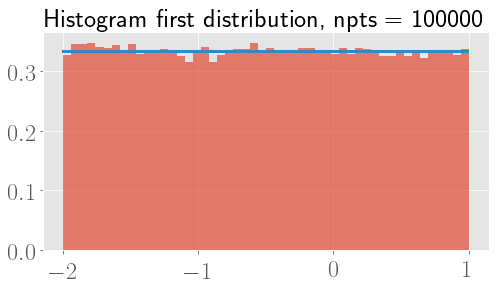

In [9]:
# Obtain the random numbers
npts = 10**5
numbers = []

for i in range(npts):
    x = random.uniform(0, 1)
    numbers.append(f1(x))

# Plot histogram and expected density function
plt.hist(numbers, density = True, bins = 50, alpha = 0.7)
t = np.arange(-2, 1, 0.01)
y = [1/3 for element in t]
plt.plot(t, y)

# Make fancy, save and show
plt.title('Histogram first distribution, npts = %d' % npts)
## Uncomment next line to save the plot
#plt.savefig('ex1_first_distr.pdf', bbox_inches = 'tight')
plt.show()

$\textbf{Second function:}$ the inverse of the cumulative distribution function is $F_2^{-1}(x) = - \log(1-x)$. 

In [10]:
def f2(x):
    return - np.log(1 - x)

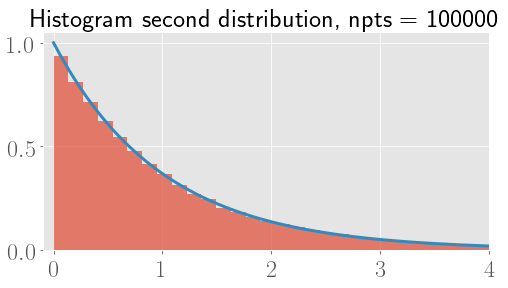

In [11]:
# Obtain the random numbers
npts = 10**5
numbers = []

for i in range(npts):
    x = random.uniform(0, 1)
    numbers.append(f2(x))

# Plot histogram and expected density function
plt.hist(numbers, density = True, bins = 80, alpha = 0.7)
t = np.arange(0, 4, 0.01)
y = np.exp(-t)
plt.plot(t, y)

# Make fancy, save and show
plt.xlim(-0.1, 4)
plt.title('Histogram second distribution, npts = %d' % npts)
## Uncomment the next line to save the plot
#plt.savefig('ex1_second_distr.pdf', bbox_inches = 'tight')
plt.show()

$\textbf{Third function:}$ The inverse cumulative distribution function is $F_3^{-1}(x) = 2x^{1/2} - 1$.

In [12]:
def f3(x):
    return 2*x**0.5 - 1

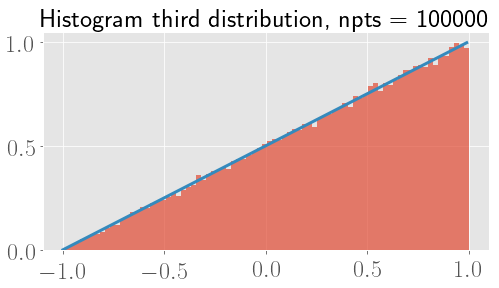

In [13]:
# Obtain the random numbers
npts = 10**5
numbers = []

for i in range(npts):
    x = random.uniform(0, 1)
    numbers.append(f3(x))

# Plot histogram and expected density function
plt.hist(numbers, density = True, bins = 80, alpha = 0.7)
t = np.arange(-1, 1, 0.01)
y = (t+1)/2
plt.plot(t, y)

# Make fancy, save and show
plt.title('Histogram third distribution, npts = %d' % npts)
## Uncomment next line to save the plot
#plt.savefig('ex1_third_distr.pdf', bbox_inches = 'tight')
plt.show()

## 1.2 - Hit-and-miss method

First of all, consider the function $f(x) = \frac{x+1}{2}$ in the interval $[-1, 1]$.

In [14]:
def f(x):
    return (x+1)/2

In [15]:
# Generate the numbers
numbers_f = []
npts = 10**5
for i in range(npts):
    value = hit_and_miss(-1, 1, 1.1, f)
    if  value != "miss":
        numbers_f.append(value)

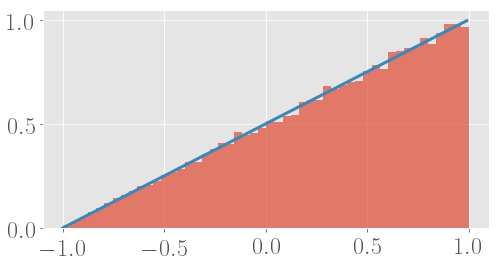

In [16]:
plt.hist(numbers_f, density = True, bins = 50, alpha = 0.7)
t = np.arange(-1, 1, 0.01)
y = f(t)
plt.plot(t, y)
plt.show()

Compare the hit-and-miss method with the previous (probability integral transformation) method for the function f3.

The following code block can take a bit of time.

In [17]:
# Define variables
npts = 10**6; nrep = 10

nhits = []
times1 = []
times2 = []

### First method:
# Report on the average after nrep repetitions
for n in range(nrep):
    numbers1 = []
    
    # Time how long it takes to generate the numbers 
    start = time.time()
    for i in range(npts):
        x = random.uniform(0, 1)
        numbers1.append(f3(x)) # generate a random number using the f3 function defined above
    end = time.time()
    times1.append(end-start)

### Second method
# Report on the average after nrep repetitions
for n in range(nrep):
    numbers2 = []
    
    # Time how long it takes to generate the numbers 
    start = time.time()
    for i in range(npts):
        value = hit_and_miss(-1, 1, 1.1, f)
        if  value != "miss":
            numbers2.append(value)
    end = time.time()
    times2.append(end-start)
    
    # Also save the number of hits = length of list of generated numbers
    nhits.append(len(numbers2))

In [18]:
print('After %d times generating %d random points, the time needed for method 1 was on average %0.4f s, while for method 2 this is %0.4f s. The hit and miss method kept on average %0.4f %% of the generated numbers.' % (nrep, npts, np.mean(times1), np.mean(times2), 100*np.mean(nhits)/npts))

After 10 times generating 1000000 random points, the time needed for method 1 was on average 0.7392 s, while for method 2 this is 0.9282 s. The hit and miss method kept on average 45.4625 % of the generated numbers.


As a second application of the hit-and-miss method, we consider $g(x) = -x(1 - x)e^{-x^2}\log(1-x)$ in the interval $[0, 1]$. The function $g$ is not normalised to one. Therefore, we compute the integral of $g(x)$ from 0 to 1.

In [19]:
I = integrate.quad(lambda x: -x*(1-x)*np.exp(-x**2/2)*np.log(1-x), 0, 1)
I[0] # value of the integral

0.11106139250158754

We apply the hit and miss algorithm to the normalised function, which we will call $g_N(x)$.

In [20]:
def gN(x):
    return (1/I[0])*(-x*(1-x)*np.exp(-x**2/2)*np.log(1-x))

For the choice of $M$, we plot the function:

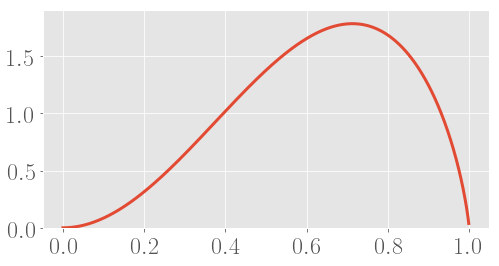

In [21]:
t = np.arange(0, 1, 0.001)
y = gN(t)
plt.plot(t, y)
plt.ylim(0, 1.9)
plt.show()

A possible choice is $M = 1.9$. Now apply hit and miss:

In [22]:
numbers_g = []
npts = 10**5
for i in range(npts):
    value = hit_and_miss(0, 1, 1.9, gN)
    if  value != "miss":
        numbers_g.append(value)

Plot the histogram along with the normalised function.

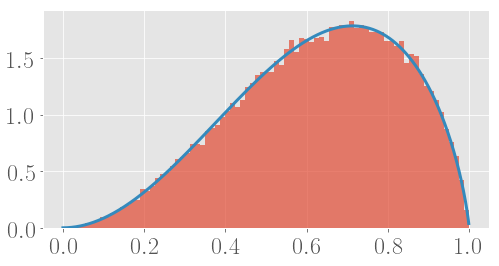

In [23]:
plt.hist(numbers_g, density = True, bins = 80, alpha = 0.7)
t = np.arange(0, 1, 0.001)
y = gN(t)
plt.plot(t, y)
## Uncomment the next line to save the plot
#plt.savefig('ex1_fourth_distr.pdf', bbox_inches = 'tight')
plt.show()

## 1.3 - Points in a circle with hit-and-miss

In [24]:
numbers_2D = []
for i in range(10**5):
    value = hit_and_miss2D_circle()
    if  value != "miss":
        numbers_2D.append(value)

In [25]:
xdata = [v[0] for v in numbers_2D]
ydata = [v[1] for v in numbers_2D]

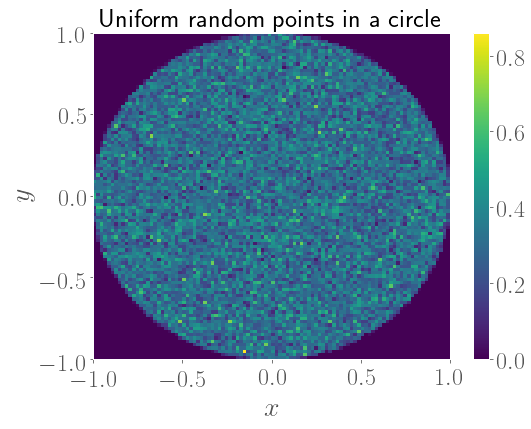

In [26]:
# Plot a 2D histogram of x and y
plt.subplots(figsize = (8, 6))
plt.hist2d(xdata, ydata, bins = 100, normed = True)

# Make fancy, save and show
plt.title('Uniform random points in a circle')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.colorbar()
## Uncomment the next line to save the plot
#plt.savefig('ex1_2D_hit_and_miss.pdf', bbox_inches = 'tight')
plt.show()

## 1.4 - Points in a circle without the hit-and-miss

The centre of the circle is $(x_0, y_0)$. Naively, we would generate points by taking $r$ from a uniform distribution in $[0, R]$, but this is wrong! I illustrate this with an explicit example.

In [27]:
def wrong_generate_2D_circle(x0 = 0, y0 = 0, R = 1):
    r = random.uniform(0, R)
    theta = random.uniform(0, 2*np.pi)
    
    return (x0 + r*np.cos(theta), y0 + r*np.sin(theta))

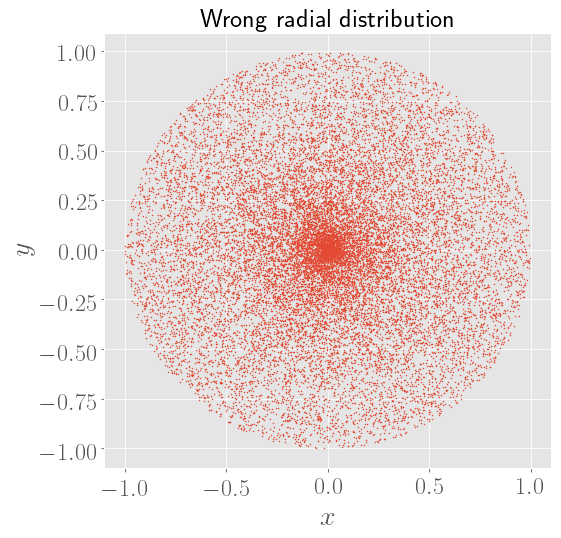

In [28]:
nstep = 2*10**4
xdata = []
ydata = []

# Generate "uniformly" points - naive method, will give wrong results!
for i in range(nstep):
    point = wrong_generate_2D_circle()
    xdata.append(point[0]); ydata.append(point[1])

# Plot the points
plt.subplots(figsize = (8, 8))
plt.scatter(xdata, ydata, s = 1)

# Make fancy, save and show
plt.title('Wrong radial distribution')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
## Uncomment the next line to save the plot
#plt.savefig('ex1_wrong_radial_distr.pdf', bbox_inches = 'tight')
plt.show()

The fact that this is wrong is also supported by the 2D density plot:

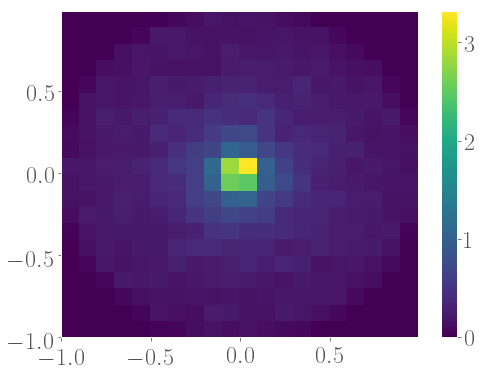

In [29]:
fig, ax = plt.subplots(figsize = (8, 6))
plt.hist2d(xdata, ydata, bins = 20, normed = True)
plt.colorbar()
plt.show()

The correct radial distribution (see report for mathematical details) then gives the following function:

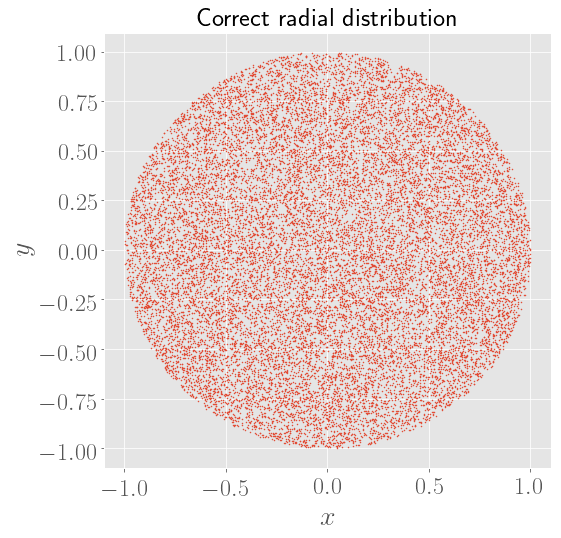

In [30]:
nstep = 2*10**4
xdata = []
ydata = []

# Generate points - correct method
for i in range(nstep):
    point = generate_2D_circle()
    xdata.append(point[0]); ydata.append(point[1])

# Make a plot
plt.subplots(figsize = (8, 8))
plt.scatter(xdata, ydata, s = 1)

# Make fancy, save and show
plt.title('Correct radial distribution')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
## Uncomment the next line to save the plot
#plt.savefig('ex1_correct_radial_distr.pdf', bbox_inches = 'tight')
plt.show()

Check that it is indeed uniform by a density plot:

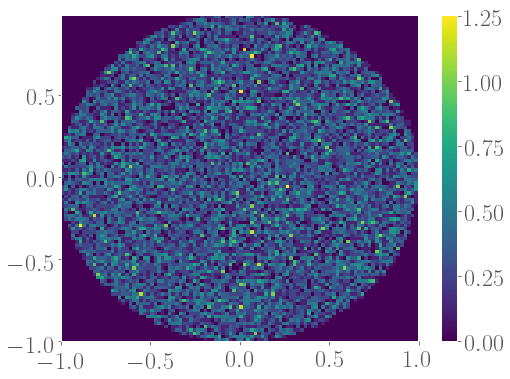

In [31]:
fig, ax = plt.subplots(figsize = (8, 6))
plt.hist2d(xdata, ydata, bins = 100, normed = True)
plt.colorbar()
plt.show()